# Housing Price Prediction

In [11661]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
import math
pd.options.display.max_columns = 1000

In [11662]:
data = pd.read_csv("train.csv")

In [11663]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [11664]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11665]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

<AxesSubplot:>

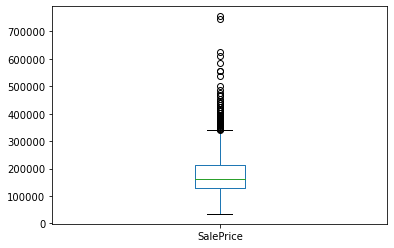

In [11666]:
data["SalePrice"].plot.box()

## Q-Q Plot Analysis for Distribution Check

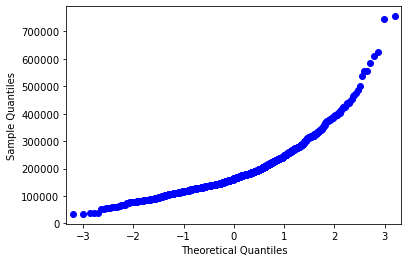

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11667]:
sm.qqplot(data['SalePrice'])
py.show()
data["SalePrice"].describe()

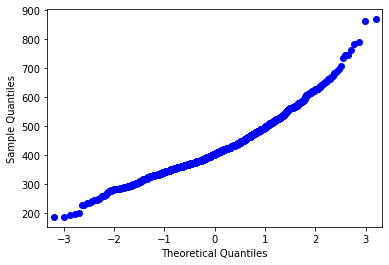

In [11668]:
sm.qqplot((data['SalePrice'])**0.5)
py.show()

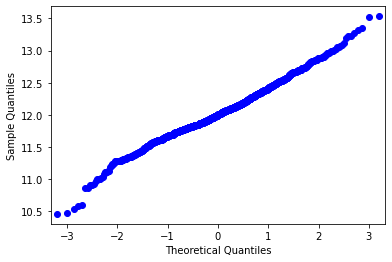

In [11669]:

sm.qqplot(np.log1p(data['SalePrice']))
py.show()

## Converting exponential distribution to Normal

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

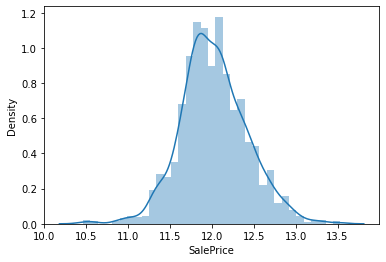

In [11670]:

sns.distplot(np.log1p(data['SalePrice']), kde=True)

In [11671]:
np.log1p(data['SalePrice']).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [11672]:
data["SalePrice"] = np.log1p(data['SalePrice'])

<AxesSubplot:>

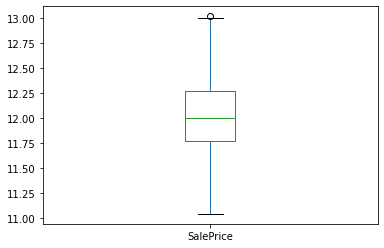

In [11673]:
def handle_outlier(data, col):
    col=str(col)
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return data[(data[col]>lower_range) & (data[col]<upper_range)]

data = handle_outlier(data,"SalePrice")

data["SalePrice"].plot.box()

## Missing Value Treatement

In [11674]:
null_col_df = pd.DataFrame(data.isnull().any()).reset_index()

In [11675]:
null_col_df.columns = ["Col","Bool"]

In [11676]:
null_col_df = null_col_df[null_col_df["Bool"]==True]
null_col_df

Col  Bool
3    LotFrontage  True
6          Alley  True
25    MasVnrType  True
26    MasVnrArea  True
30      BsmtQual  True
31      BsmtCond  True
32  BsmtExposure  True
33  BsmtFinType1  True
35  BsmtFinType2  True
42    Electrical  True
57   FireplaceQu  True
58    GarageType  True
59   GarageYrBlt  True
60  GarageFinish  True
63    GarageQual  True
64    GarageCond  True
72        PoolQC  True
73         Fence  True
74   MiscFeature  True

In [11677]:
null_col_df["na_count"] = null_col_df["Col"].apply(lambda x: data[x].isna().sum())

In [11678]:
'''
Check data dictionary and replace categorical with none
and check numerical

'''
null_col_df


Col  Bool  na_count
3    LotFrontage  True       257
6          Alley  True      1344
25    MasVnrType  True         7
26    MasVnrArea  True         7
30      BsmtQual  True        35
31      BsmtCond  True        35
32  BsmtExposure  True        36
33  BsmtFinType1  True        35
35  BsmtFinType2  True        36
42    Electrical  True         1
57   FireplaceQu  True       676
58    GarageType  True        72
59   GarageYrBlt  True        72
60  GarageFinish  True        72
63    GarageQual  True        72
64    GarageCond  True        72
72        PoolQC  True      1426
73         Fence  True      1157
74   MiscFeature  True      1380

In [11679]:
# numeric: LotFrontage, 

# Categorical: Alley,BsmtQual, BsmtCond,BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, 
#GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Remove Missing: MasVnrType,MasVnrArea, Electrical, GarageYrBlt

In [11680]:
data["BsmtCond"].value_counts()

TA    1292
Gd      64
Fa      40
Po       1
Name: BsmtCond, dtype: int64

In [11681]:
data[["Alley","BsmtQual"," BsmtCond","BsmtExposure"," BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]]=data[["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]].fillna(value="None")

In [11682]:
data = data[data['MasVnrType'].notna()]
data = data[data['MasVnrArea'].notna()]
data = data[data['Electrical'].notna()]
data = data[data['GarageYrBlt'].notna()]

In [11683]:
data["LotFrontage"].isna().sum()

249

In [11684]:
data[["BsmtCond","BsmtFinType1"]] = data[["BsmtCond","BsmtFinType1"]].fillna(value="None")

In [11685]:
data["LotFrontage"].describe()

count    1103.000000
mean       70.463282
std        24.114749
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

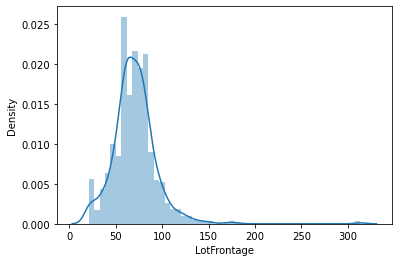

In [11686]:
sns.distplot(data["LotFrontage"], kde=True)

### Imputation of column 'LotFrontage' is destablizing the model even after trying different approaches, so better to drop.


In [11687]:
#mean_value = data["LotFrontage"].median()
#data["LotFrontage"].fillna(value=mean_value, inplace=True)


#mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
#num=data.describe(exclude = ['object']).columns;
#data[num] = mice_imputer.fit_transform(data[num])


data.drop("LotFrontage",inplace=True,axis=1)



## Columns Analysis

In [11688]:
categorical_cols = data.describe(exclude = ['int', 'float']).columns

In [11689]:
data.describe(exclude = ['int', 'float'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1352   1352  1352     1352        1352      1352      1352   
unique        5      2     3        4           4         2         5   
top          RL   Pave  None      Reg         Lvl    AllPub    Inside   
freq       1081   1348  1273      844        1220      1351       968   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1352         1352       1352       1352     1352       1352   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1281          219       1170       1338     1140        672   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1352     1352        1352        1352       1352      1352   
unique         6        8          14          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1056     1329         486         475        780       827   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1352       1352     1352     1352         1352         1352   
unique         4          6        5        5            5            7   
top           TA      PConc       Gd       TA           No          GLQ   
freq        1199        613      593     1224          882          395   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1352    1352      1352       1352       1352        1352   
unique            7       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1160    1326       701       1288       1251         671   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1352        1352       1352         1352       1352       1352   
unique          7           6          6            3          5          5   
top           Typ        None     Attchd          Unf         TA         TA   
freq         1263         607        855          598       1285       1301   

       PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  BsmtCond  \
count        1352   1352  1352        1352     1352          1352      1352   
unique          3      4     5           5        9             6         5   
top             Y   None  None        None       WD        Normal        TA   
freq         1269   1346  1090        1302     1176          1123      1224   

        BsmtFinType1  
count           1352  
unique             7  
top              GLQ  
freq             395

In [11690]:
data.describe(exclude = ['object'])

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1352.000000  1352.000000    1352.000000  1352.000000  1352.000000   
mean    729.923077    56.235207   10606.051036     6.164941     5.591716   
std     421.512244    41.246198   10191.365257     1.301999     1.075474   
min       1.000000    20.000000    1300.000000     3.000000     2.000000   
25%     363.750000    20.000000    7680.000000     5.000000     5.000000   
50%     729.500000    50.000000    9587.500000     6.000000     5.000000   
75%    1093.250000    70.000000   11665.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1352.000000   1352.000000  1352.000000  1352.000000  1352.000000   
mean   1972.761834   1985.319527   105.309911   449.698225    48.664201   
std      29.222687     20.389108   175.653634   450.208354   165.284694   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1955.000000   1968.000000     0.000000     0.000000     0.000000   
50%    1975.000000   1994.000000     0.000000   400.000000     0.000000   
75%    2001.000000   2004.000000   170.000000   721.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1352.000000  1352.000000  1352.000000  1352.000000   1352.000000   
mean    567.443047  1065.805473  1169.576923   348.551036      3.794379   
std     441.153095   423.250593   375.147730   431.454533     37.463457   
min       0.000000     0.000000   483.000000     0.000000      0.000000   
25%     223.750000   808.000000   894.000000     0.000000      0.000000   
50%     474.000000  1004.500000  1096.500000     0.000000      0.000000   
75%     808.500000  1306.000000  1392.500000   729.250000      0.000000   
max    2336.000000  6110.000000  4692.000000  1818.000000    528.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1352.000000   1352.000000   1352.000000  1352.000000  1352.000000   
mean   1521.922337      0.428254      0.059172     1.571746     0.392012   
std     493.375220      0.514081      0.239148     0.538001     0.501835   
min     520.000000      0.000000      0.000000     0.000000     0.000000   
25%    1151.500000      0.000000      0.000000     1.000000     0.000000   
50%    1478.000000      0.000000      0.000000     2.000000     0.000000   
75%    1779.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      2.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1352.000000   1352.000000   1352.000000  1352.000000  1352.000000   
mean       2.866124      1.038462      6.525888     0.636095  1978.296598   
std        0.776586      0.196189      1.546011     0.639762    24.604045   
min        0.000000      1.000000      3.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        6.000000      3.000000     12.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1352.000000  1352.000000  1352.000000  1352.000000    1352.000000   
mean      1.862426   498.243343    97.372781    46.730769      21.113166   
std       0.624216   183.424616   126.248788    64.926070      60.705290   
min       1.000000   160.000000     0.000000     0.000000       0.000000   
25%       1.000000   378.500000     0.000000     0.000000       0.000000   
50%       2.000000   484.000000     0.000000    27.000000       0.000000   
75%       2.000000   576.250000   171.000000    68.000000       0.00

In [11691]:
numerical_cols = data.describe(exclude = ['object']).columns

In [11692]:
data.corr()["SalePrice"]

Id              -0.035492
MSSubClass      -0.075819
LotArea          0.236366
OverallQual      0.801227
OverallCond     -0.088019
YearBuilt        0.582971
YearRemodAdd     0.568497
MasVnrArea       0.391682
BsmtFinSF1       0.334151
BsmtFinSF2      -0.014163
BsmtUnfSF        0.221076
TotalBsmtSF      0.580330
1stFlrSF         0.562377
2ndFlrSF         0.293215
LowQualFinSF    -0.054747
GrLivArea        0.679872
BsmtFullBath     0.240831
BsmtHalfBath    -0.028749
FullBath         0.578356
HalfBath         0.284927
BedroomAbvGr     0.184690
KitchenAbvGr    -0.165901
TotRmsAbvGrd     0.504826
Fireplaces       0.461151
GarageYrBlt      0.535817
GarageCars       0.642864
GarageArea       0.598359
WoodDeckSF       0.321303
OpenPorchSF      0.350379
EnclosedPorch   -0.135975
3SsnPorch        0.055722
ScreenPorch      0.085274
PoolArea         0.038350
MiscVal         -0.011675
MoSold           0.073083
YrSold          -0.029794
SalePrice        1.000000
Name: SalePrice, dtype: float64

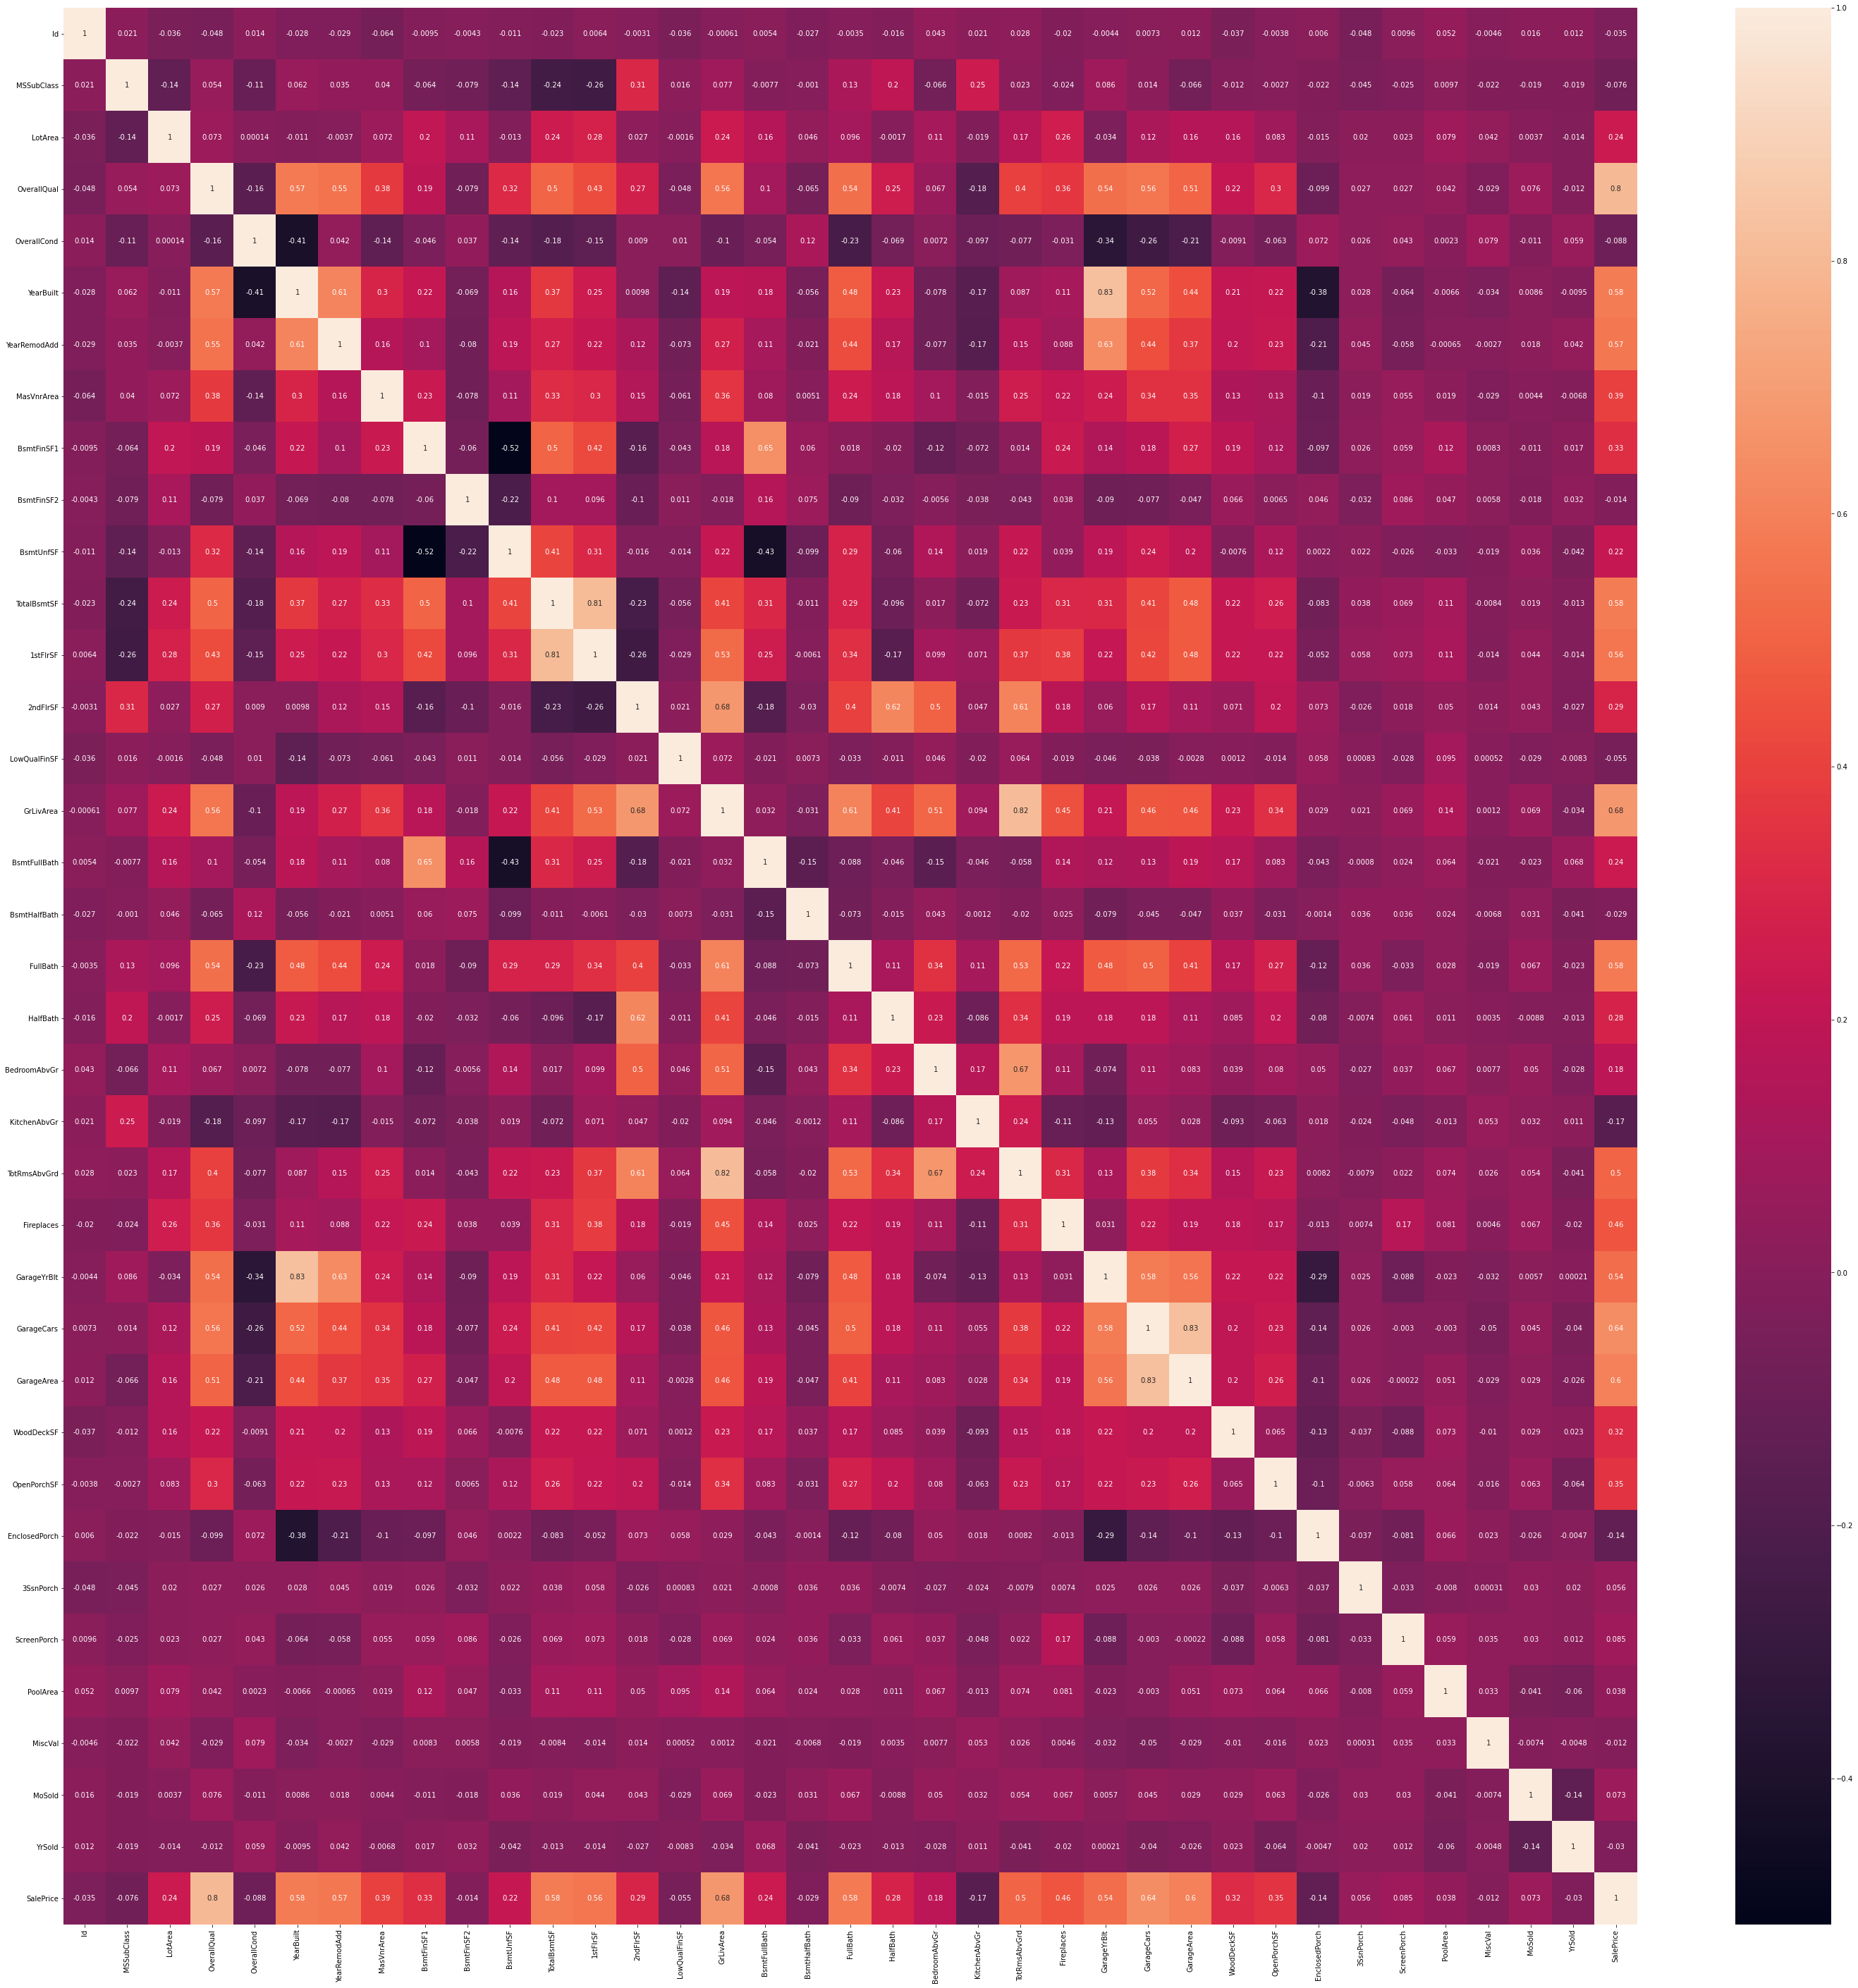

In [11693]:
plt.figure(figsize = (50, 50))
sns.heatmap(data[numerical_cols].corr(), annot = True)
plt.show()


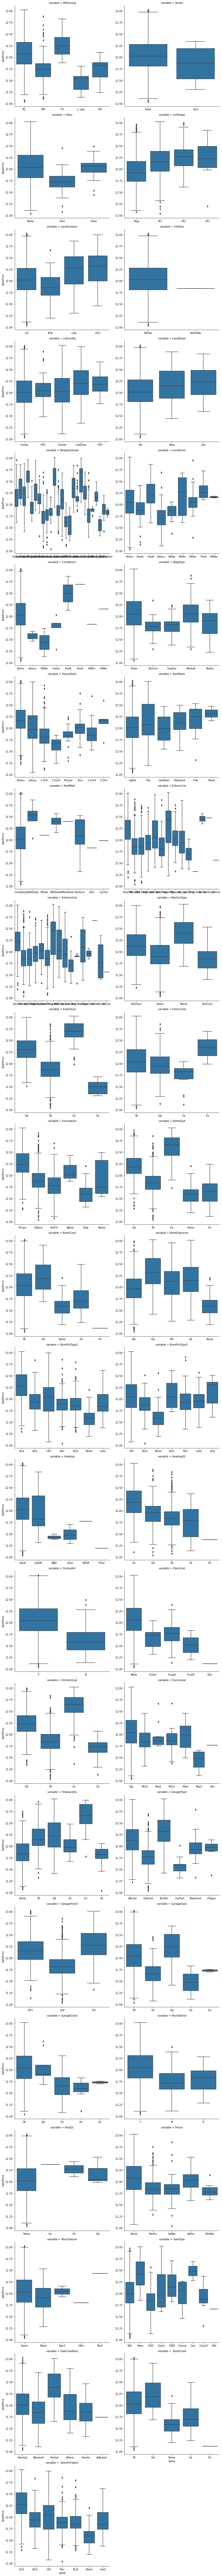

In [11694]:
data_ctg = pd.melt(data, id_vars = 'SalePrice', value_vars = categorical_cols)
graph = sns.FacetGrid(data_ctg, col='variable',  col_wrap=2, sharex=False, sharey=False, size=6, palette='Set1')
graph = graph.map(sns.boxplot, 'value', 'SalePrice')


In [11695]:
## Remove high correlated Data and all same columns

colums_to_drop=["Id", "GarageYrBlt", "GarageArea", "1stFlrSF", "TotRmsAbvGrd","Utilities"] 

data.drop(colums_to_drop, axis = 1, inplace=True)

In [11696]:
numerical_cols = data.describe(exclude = ['object']).columns
numerical_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

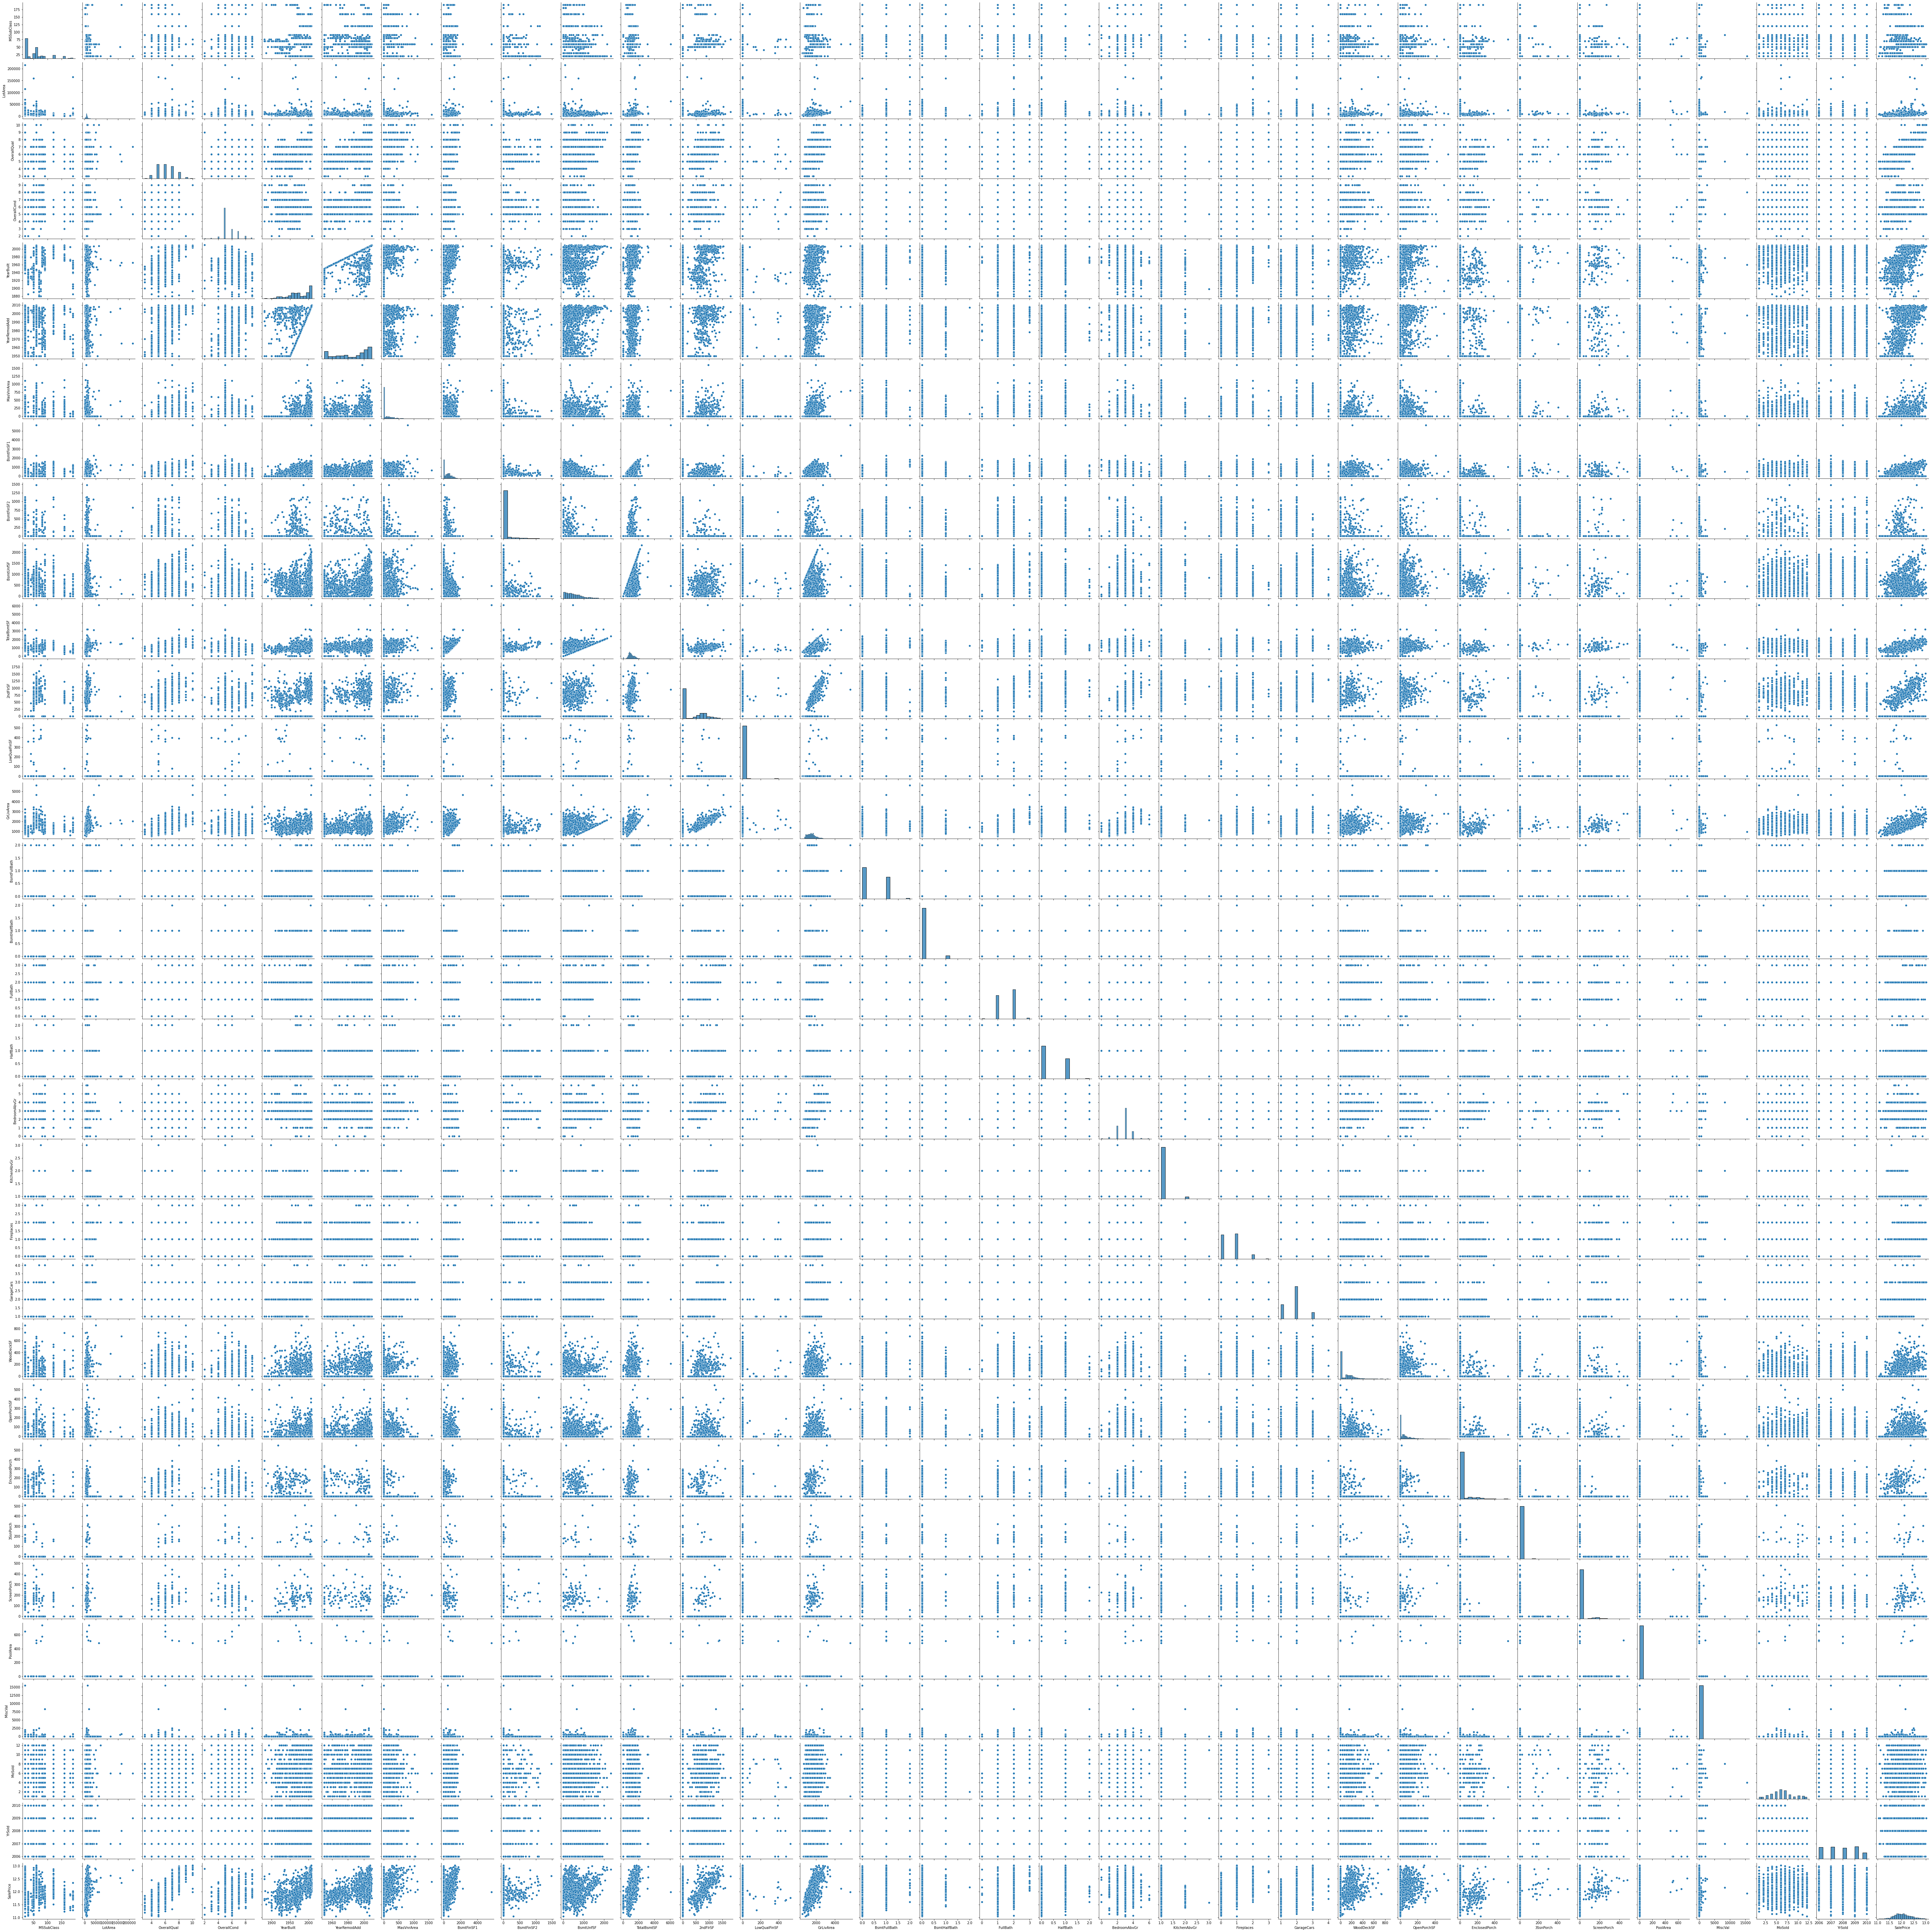

In [11697]:
sns.pairplot(data[numerical_cols])

In [11698]:
data["remodel"] = data["YearRemodAdd"]-data["YearBuilt"]
data["remodel"] = data["remodel"].apply(lambda x: "yes" if x>0 else "No")

### Feature Types

In [11699]:

numerical_cols = data.describe(exclude = ['object']).columns

In [11700]:
numerical_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11701]:

categorical_cols = data.describe(exclude = ['int', 'float']).columns

### Dummy Encoding for Categorical Features


In [11702]:
categorical_cols = data.describe(exclude = ['int', 'float']).columns
encoded = pd.get_dummies(data[categorical_cols], drop_first = True)
encoded

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0              1           0             0             0             1   
1              1           0             0             0             1   
2              1           0             0             0             0   
3              1           0             0             0             0   
4              1           0             0             0             0   
...          ...         ...           ...           ...           ...   
1455           1           0             0             0             1   
1456           1           0             0             0             1   
1457           1           0             0             0             1   
1458           1           0             0             0             1   
1459           1           0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                   0                0                1                  0   
1                   0                0                1                  0   
2                   0                0                1                  0   
3                   0                0                1                  0   
4                   0                0                1                  0   
...               ...              ...              ...                ...   
1455                0                0                1                  0   
1456                0                0                1                  0   
1457                0                0                1                  0   
1458                0                0                1                  0   
1459                0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0                 0              0                 1              0   
1                 1              0                 0              0   
2                 0              0                 1              0   
3                 0              0                 0              0   
4                 1              0                 0              0   
...             ...            ...               ...            ...   
1455              0              0                 1              0   
1456              0              0                 1              0   
1457              0              0                 1              0   
1458              0              0                 1              0   
1459              0              0                 1              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 0                     0                    0   
1                 0                     0                    0   
2                 0                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   
...             ...                   ...             

In [11703]:
data.drop(categorical_cols, axis = 1, inplace=True)

In [11704]:
data = pd.concat([data, encoded], axis = 1)

In [11705]:
data.describe(exclude = ['int', 'float'])

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
count  1352.000000  1352.000000  1352.000000  1352.000000  1352.000000   
mean      0.045858     0.008876     0.799556     0.142012     0.997041   
std       0.209254     0.093827     0.400481     0.349191     0.054332   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.000000     1.000000   
75%       0.000000     0.000000     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Alley_None   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
count  1352.000000  1352.000000   1352.000000   1352.000000   1352.000000   
mean      0.941568     0.027367      0.028846      0.007396      0.624260   
std       0.234645     0.163210      0.167436      0.085716      0.484493   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       1.000000     0.000000      0.000000      0.000000      0.000000   
50%       1.000000     0.000000      0.000000      0.000000      1.000000   
75%       1.000000     0.000000      0.000000      0.000000      1.000000   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

       LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
count      1352.000000      1352.000000      1352.000000        1352.000000   
mean          0.034763         0.024408         0.902367           0.065828   
std           0.183248         0.154370         0.296928           0.248074   
min           0.000000         0.000000         0.000000           0.000000   
25%           0.000000         0.000000         1.000000           0.000000   
50%           0.000000         0.000000         1.000000           0.000000   
75%           0.000000         0.000000         1.000000           0.000000   
max           1.000000         1.000000         1.000000           1.000000   

       LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
count    1352.000000    1352.000000       1352.000000    1352.000000   
mean        0.032544       0.002959          0.715976       0.043639   
std         0.177506       0.054332          0.451115       0.204366   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.000000       0.000000          0.000000       0.000000   
50%         0.000000       0.000000          1.000000       0.000000   
75%         0.000000       0.000000          1.000000       0.000000   
max         1.000000       1.000000          1.000000       1.000000   

       LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
count    1352.000000           1352.000000          1352.000000   
mean        0.008876              0.001479             0.011095   
std         0.093827              0.038447             0.104784   
min         0.000000              0.000000             0.000000   
25%         0.000000              0.000000             0.000000   
50%         0.000000              0.000000             0.000000   
75%         0.000000              0.000000             0.000000   
max         1.000000              1.000000             1.000000   

       Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
count           1352.000000            1352.00000           1352.000000   
mean               0.035503               0.01997              0.108728   
std                0.185116               0.13995              0.311413   
min                0.000000               0.00000              0.000000   
25%                0.000000               0.00000              0.000000   
50%                0.000000               0.00000              0.000000   
75%                0.000000               0.00000              0.000000   
max                1.000000               1.00000              1.000000   

     

## Train Test Split Model 1 (RFE)

In [11706]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [11707]:
scaler = StandardScaler()
# MinMaxScaler is not working here, error is too high

In [11708]:

data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])

In [11709]:
y_train = data_train.pop('SalePrice')
X_train = data_train

In [11710]:
data.shape

(1352, 259)

In [11711]:
data_test[numerical_cols] = scaler.transform(data_test[numerical_cols])
y_test = data_test.pop('SalePrice')
X_test = data_test

## RFE MODEL

In [11712]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [11713]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     60.50
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:08:13   Log-Likelihood:                 28.655
No. Observations:                1081   AIC:                             418.7
Df Residuals:                     843   BIC:                             1605.
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.0694      1.799     -8.377      0.000     -18.600     -11.539
MSSubClass               -0.0223      0.045     -0.495      0.621      -0.111       0.066
LotArea                   0.0903      0.015      5.824      0.000       0.060       0.121
OverallQual               0.1456      0.019      7.627      0.000       0.108       0.183
OverallCond               0.1234      0.014      9.048      0.000       0.097       0.150
YearBuilt                 0.1396      0.034      4.066      0.000       0.072       0.207
YearRemodAdd              0.0209      0.017      1.204      0.229      -0.013       0.055
MasVnrArea                0.0066      0.014      0.465      0.642      -0.021       0.034
BsmtFinSF1                0.0804      0.015      5.302      0.000       0.051       0.110
BsmtFinSF2                0.0267      0.017      1.594      0.111      -0.006       0.060
BsmtUnfSF                 0.0029      0.014      0.213      0.831      -0.024       0.030
TotalBsmtSF               0.0998      0.022      4.534      0.000       0.057       0.143
2ndFlrSF                 -0.0133      0.045     -0.294      0.768      -0.102       0.075
LowQualFinSF             -0.0126      0.013     -0.950      0.342      -0.039       0.013
GrLivArea                 0.3267      0.038      8.702      0.000       0.253       0.400
BsmtFullBath              0.0310      0.015      2.116      0.035       0.002       0.060
BsmtHalfBath              0.0078      0.010      0.773      0.440      -0.012       0.028
FullBath                  0.0210      0.017      1.222      0.222      -0.013       0.055
HalfBath                  0.0148      0.015      0.975      0.330      -0.015       0.045
BedroomAbvGr              0.0064      0.014      0.448      0.654      -0.022       0.035
KitchenAbvGr             -0.0373      0.019     -1.981      0.048      -0.074      -0.000
Fireplaces                0.0287      0.022      1.307      0.192      -0.014       0.072
GarageCars                0.0904      0.014      6.500      0.000       0.063       0.118
WoodDeckSF                0.0345      0.011      3.268      0.001       0.014       0.055
OpenPorchSF               0.0119      0.011      1.100      0.272      -0.009       0.033
EnclosedPorch             0.0185      0.011      1.656      0.098      -0.003       0.041
3SsnPorch                 0.0122      0.009      1.337      0.182      -0.006       0.030
ScreenPorch               0.0313      0.010      3.224      0.001       0.012       0.050
PoolArea                  0.4426      0.051      8.607      0.000       0.342       0.544
MiscVal                   0.0913      0.056      1.628      0.104      -0.019       0.201
MoSold                   -0.0082      0.009     -0.887      0.375      -0.026       0.010
YrSold                 

In [11714]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
161         BsmtCond_Po  inf
234    MiscFeature_TenC  inf
254    BsmtFinType1_LwQ  inf
253    BsmtFinType1_GLQ  inf
252    BsmtFinType1_BLQ  inf
..                  ...  ...
89      Condition2_RRNn  NaN
107    RoofMatl_Membran  NaN
115  Exterior1st_CBlock  NaN
129  Exterior2nd_CBlock  NaN
232    MiscFeature_Othr  NaN

[259 rows x 2 columns]

In [11715]:
rfe_var_count = 30

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, rfe_var_count)             
rfe = rfe.fit(X_train_lm, y_train)

In [11716]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 210),
 ('LotArea', False, 184),
 ('OverallQual', False, 75),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 48),
 ('YearRemodAdd', False, 41),
 ('MasVnrArea', False, 182),
 ('BsmtFinSF1', False, 216),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 31),
 ('TotalBsmtSF', False, 34),
 ('2ndFlrSF', False, 15),
 ('LowQualFinSF', False, 213),
 ('GrLivArea', False, 203),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 165),
 ('FullBath', False, 212),
 ('HalfBath', False, 183),
 ('BedroomAbvGr', False, 187),
 ('KitchenAbvGr', False, 215),
 ('Fireplaces', False, 118),
 ('GarageCars', False, 186),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 168),
 ('EnclosedPorch', False, 201),
 ('3SsnPorch', False, 192),
 ('ScreenPorch', False, 197),
 ('PoolArea', False, 166),
 ('MiscVal', True, 1),
 ('MoSold', False, 104),
 ('YrSold', False, 209),
 ('MSZoning_FV', False, 207),
 ('MSZoning_RH', False, 47),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 73),
 ('Street

In [11717]:
col = X_train_lm.columns[rfe.support_]
len(col)

30

In [11718]:
X_train_rfe = X_train_lm[col]

In [11719]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [11720]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit() 

In [11721]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
len(vif[vif["VIF"]>5].Features)

12

In [11722]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:08:20   Log-Likelihood:                -561.09
No. Observations:                1081   AIC:                             1184.
Df Residuals:                    1050   BIC:                             1339.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.7110      1.558     -7.516      0.000     -14.769      -8.653
OverallQual              0.4116      0.018     22.658      0.000       0.376       0.447
GrLivArea                0.4222      0.016     25.961      0.000       0.390       0.454
PoolArea                 0.5149      0.172      2.996      0.003       0.178       0.852
MSZoning_RH             -0.3549      0.135     -2.629      0.009      -0.620      -0.090
MSZoning_RM             -0.4565      0.040    -11.504      0.000      -0.534      -0.379
Neighborhood_MeadowV    -0.3591      0.143     -2.508      0.012      -0.640      -0.078
Condition2_PosN         -2.2319      0.299     -7.469      0.000      -2.818      -1.646
Condition2_RRAn         -0.3936      0.413     -0.952      0.341      -1.205       0.417
RoofMatl_CompShg         2.7559      1.271      2.167      0.030       0.261       5.251
RoofMatl_Metal           3.3992      1.337      2.543      0.011       0.776       6.022
RoofMatl_Roll            2.1600      1.337      1.616      0.106      -0.463       4.783
RoofMatl_Tar&Grv         2.9699      1.260      2.357      0.019       0.498       5.442
RoofMatl_WdShake         2.7485      1.288      2.134      0.033       0.221       5.276
RoofMatl_WdShngl         3.3522      1.294      2.591      0.010       0.813       5.891
Foundation_Wood         -0.5307      0.239     -2.220      0.027      -1.000      -0.062
BsmtCond_Gd              0.2965      0.100      2.975      0.003       0.101       0.492
BsmtCond_TA              0.3040      0.081      3.754      0.000       0.145       0.463
BsmtFinType2_None        0.4207      0.414      1.017      0.309      -0.391       1.232
CentralAir_Y             0.4151      0.065      6.340      0.000       0.287       0.544
Electrical_Mix          -0.8226      0.425     -1.935      0.053      -1.657       0.012
Functional_Sev          -1.6863      0.448     -3.766      0.000      -2.565      -0.808
GarageQual_Gd            0.3742      0.154      2.428      0.015       0.072       0.677
GarageQual_TA            0.2952      0.071      4.141      0.000       0.155       0.435
PoolQC_Gd               -1.0452      0.876     -1.194      0.233      -2.764       0.673
PoolQC_None              7.9820      2.519      3.169      0.002       3.040      12.924
MiscFeature_TenC         0.9969      0.570      1.750      0.080      -0.121       2.115
SaleType_ConLI          -0.3296      0.240     -1.372      0.170      -0.801       0.142
SaleType_New             0.3534      0.049      7.253      0.000       0.258       0.449
 BsmtCond_None          -0.5585      0.429     -1.301      0.194      -1.401       0.284
 BsmtFinType1_GLQ        0.3184      0.031     10.305      0.000       0.258       0.379
=========================================================

In [11723]:
X_train_rfe.drop(["Condition2_RRAn","BsmtFinType2_None","PoolQC_Gd","PoolQC_None","SaleType_ConLI","MiscFeature_TenC","Electrical_Mix","RoofMatl_CompShg","RoofMatl_WdShake","RoofMatl_Metal","RoofMatl_Roll"],inplace=True, axis=1)
   
col = X_train_rfe.columns

In [11724]:

lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [11725]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:08:20   Log-Likelihood:                -639.92
No. Observations:                1081   AIC:                             1320.
Df Residuals:                    1061   BIC:                             1420.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0429      0.115     -9.105      0.000      -1.268      -0.818
OverallQual              0.4331      0.019     22.452      0.000       0.395       0.471
GrLivArea                0.3743      0.017     22.199      0.000       0.341       0.407
PoolArea                -0.0663      0.014     -4.683      0.000      -0.094      -0.039
MSZoning_RH             -0.3640      0.144     -2.520      0.012      -0.647      -0.081
MSZoning_RM             -0.4735      0.042    -11.175      0.000      -0.557      -0.390
Neighborhood_MeadowV    -0.3457      0.153     -2.257      0.024      -0.646      -0.045
Condition2_PosN         -2.0534      0.319     -6.430      0.000      -2.680      -1.427
RoofMatl_Tar&Grv         0.4646      0.175      2.657      0.008       0.121       0.808
RoofMatl_WdShngl         0.6078      0.256      2.371      0.018       0.105       1.111
Foundation_Wood         -0.4995      0.256     -1.953      0.051      -1.001       0.002
BsmtCond_Gd              0.3252      0.105      3.091      0.002       0.119       0.532
BsmtCond_TA              0.3322      0.085      3.909      0.000       0.165       0.499
CentralAir_Y             0.4052      0.070      5.804      0.000       0.268       0.542
Functional_Sev          -1.8589      0.476     -3.907      0.000      -2.792      -0.925
GarageQual_Gd            0.5511      0.160      3.437      0.001       0.236       0.866
GarageQual_TA            0.3142      0.076      4.160      0.000       0.166       0.462
SaleType_New             0.3025      0.052      5.833      0.000       0.201       0.404
 BsmtCond_None          -0.1120      0.121     -0.929      0.353      -0.349       0.125
 BsmtFinType1_GLQ        0.2992      0.033      9.086      0.000       0.235       0.364
==============================================================================
Omnibus:                      365.493   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5453.850
Skew:                          -1.134   Prob(JB):                         0.00
Kurtosis:                      13.768   Cond. No.                         69.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11726]:
lm_rfe.summary()
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const  72.77
12           BsmtCond_TA   3.63
11           BsmtCond_Gd   2.86
1            OverallQual   2.06
18         BsmtCond_None   1.89
2              GrLivArea   1.58
16         GarageQual_TA   1.37
15         GarageQual_Gd   1.31
19      BsmtFinType1_GLQ   1.25
8       RoofMatl_Tar&Grv   1.25
13          CentralAir_Y   1.19
5            MSZoning_RM   1.19
14        Functional_Sev   1.16
17          SaleType_New   1.15
3               PoolArea   1.11
6   Neighborhood_MeadowV   1.07
4            MSZoning_RH   1.06
7        Condition2_PosN   1.04
9       RoofMatl_WdShngl   1.01
10       Foundation_Wood   1.00

## Residual Analysis

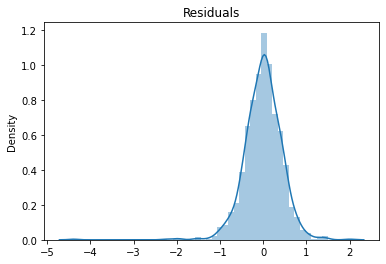

In [11727]:
y_train_pred = lm_rfe.predict(X_train_rfe)
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [11728]:
#Due to existing constant variance feature sm fails to add const so added on our own
X_test_lm = X_test
X_test_lm["const"]=1
X_test_lm = X_test_lm[col]

In [11729]:
y_test_pred = lm_rfe.predict(X_test_lm) 

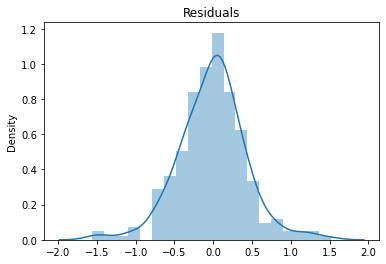

In [11730]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [11731]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

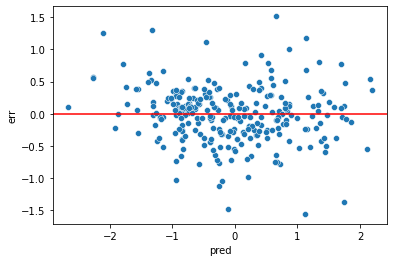

In [11732]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [11733]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
rss_test = np.sum((y_test-y_test_pred)**2)
rss_train =  np.sum((y_train-y_train_pred)**2)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)

error_metrics = pd.DataFrame(index=["R2 Test","R2 Train","MSE Train","MSE Test"],columns=["Ridge","Lasso","RFE"])
error_metrics["RFE"] = np.array([r2_test,r2_train,mse_train,mse_test])
error_metrics


R2 Test:  0.7989423550467337
R2 Train:  0.8087057550126744
MSE Train:  0.19129424498732567
MSE Test:  0.18888954484105272


Ridge Lasso       RFE
R2 Test     NaN   NaN  0.798942
R2 Train    NaN   NaN  0.808706
MSE Train   NaN   NaN  0.191294
MSE Test    NaN   NaN  0.188890

# Regularization

In [11734]:
np.random.seed(0)
data_train, data_test = train_test_split(data[rfe_col], train_size = 0.8, test_size = 0.2, random_state = 100,shuffle=True)

numerical_cols = data[rfe_col].describe(exclude = ['object']).columns

data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])
y_train = data_train.pop('SalePrice')
X_train = data_train
data_test[numerical_cols] = scaler.transform(data_test[numerical_cols])
y_test = data_test.pop('SalePrice')
X_test = data_test

In [11735]:

data[rfe_col].columns

Index(['OverallQual', 'GrLivArea', 'PoolArea', 'MSZoning_RH', 'MSZoning_RM',
       'Neighborhood_MeadowV', 'Condition2_PosN', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Foundation_Wood', 'BsmtCond_Gd', 'BsmtCond_TA',
       'CentralAir_Y', 'Electrical_Mix', 'Functional_Sev', 'GarageQual_Gd',
       'GarageQual_TA', 'MiscFeature_TenC', 'SaleType_New', ' BsmtCond_None',
       ' BsmtFinType1_GLQ', 'SalePrice'],
      dtype='object')

## Ridge Regression

#### Features selected by RFE are supplied to Ridge

In [11736]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 1,2,3,4,5,6,7,8,9,10,
                20,50,100,500,700,900,1000,1500,2000]}


params={'alpha':np.linspace(1,40,100)}

In [11737]:
ridge=Ridge()

In [11738]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=kf,
                       return_train_score=True,
                       verbose=1)

In [11739]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([ 1.        ,  1.39393939,  1.78787879,  2.18181818,  2.57575758,
        2.96969697,  3.36363636,  3.75757576,  4.15151515,  4.54545455,
        4.93939394,  5.33333333,  5.72727273,  6.12121212,  6.51515152,
        6.90909091,  7.3030303 ,  7.6969697 ,  8.09090909,  8.48484848,
        8.87878788,  9.27272727,  9.66666667...
       30.54545455, 30.93939394, 31.33333333, 31.72727273, 32.12121212,
       32.51515152, 32.90909091, 33.3030303 , 33.6969697 , 34.09090909,
       34.48484848, 34.87878788, 35.27272727, 35.66666667, 36.06060606,
       36.45454545, 36.84848485, 37.24242424, 37.63636364, 38.03030303,
       38.42424242, 38.81818182, 39.21212121, 39.60606061, 40.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [11740]:
model_cv.best_params_


{'alpha': 18.333333333333332}

In [11741]:
alpha=model_cv.best_params_['alpha']
ridge=Ridge(alpha=alpha)

In [11742]:
ridge.fit(X_train,y_train)

Ridge(alpha=18.333333333333332)

In [11743]:
ridge.coef_

array([ 0.42751843,  0.36933377, -0.073394  , -0.03502198, -0.16141558,
       -0.03205205, -0.0855297 ,  0.04042683,  0.03219114, -0.02550301,
        0.05999521,  0.08604946,  0.08743767, -0.0259812 , -0.05544295,
        0.05164536,  0.06106447,  0.02368186,  0.085428  , -0.02437627,
        0.13795897])

In [11744]:
y_train_pred = ridge.predict(X_train)

In [11745]:
metrics = {'col':X_train.columns,
          'coeff_ridge':ridge.coef_}
metrics = pd.DataFrame(metrics)

In [11746]:
metrics_g = metrics[:]
metrics_g["coeff_ridge_abs"] = metrics_g.coeff_ridge.apply(lambda x: abs(x))
metrics_g = metrics_g.sort_values(by=['coeff_ridge_abs'], ascending=False)
metrics_g.reset_index(inplace=True)
metrics_g.head(30)


index                   col  coeff_ridge  coeff_ridge_abs
0       0           OverallQual     0.427518         0.427518
1       1             GrLivArea     0.369334         0.369334
2       4           MSZoning_RM    -0.161416         0.161416
3      20      BsmtFinType1_GLQ     0.137959         0.137959
4      12          CentralAir_Y     0.087438         0.087438
5      11           BsmtCond_TA     0.086049         0.086049
6       6       Condition2_PosN    -0.085530         0.085530
7      18          SaleType_New     0.085428         0.085428
8       2              PoolArea    -0.073394         0.073394
9      16         GarageQual_TA     0.061064         0.061064
10     10           BsmtCond_Gd     0.059995         0.059995
11     14        Functional_Sev    -0.055443         0.055443
12     15         GarageQual_Gd     0.051645         0.051645
13      7      RoofMatl_Tar&Grv     0.040427         0.040427
14      3           MSZoning_RH    -0.035022         0.035022
15      8      RoofMatl_WdShngl     0.032191         0.032191
16      5  Neighborhood_MeadowV    -0.032052         0.032052
17     13        Electrical_Mix    -0.025981         0.025981
18      9       Foundation_Wood    -0.025503         0.025503
19     19         BsmtCond_None    -0.024376         0.024376
20     17      MiscFeature_TenC     0.023682         0.023682

### Residual Analysis

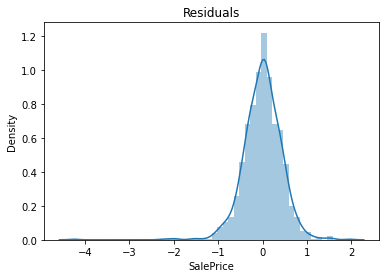

In [11747]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [11748]:
y_test_pred = ridge.predict(X_test) 

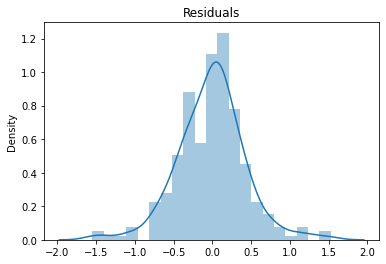

In [11749]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [11750]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

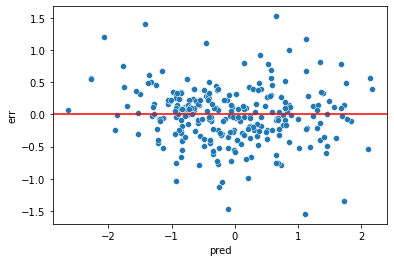

In [11751]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [11752]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)

error_metrics["Ridge"] = np.array([r2_test,r2_train,mse_train,mse_test])
error_metrics

R2 Test:  0.7987217970525565
R2 Train:  0.8097442574414032
MSE Train:  0.19025574255859679
MSE Test:  0.18909675456511407


Ridge Lasso       RFE
R2 Test    0.798722   NaN  0.798942
R2 Train   0.809744   NaN  0.808706
MSE Train  0.190256   NaN  0.191294
MSE Test   0.189097   NaN  0.188890

## Lasso Regression

In [11753]:
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100,shuffle=True)
numerical_cols = data.describe(exclude = ['object']).columns

data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])
y_train = data_train.pop('SalePrice')
X_train = data_train

data_test[numerical_cols] = scaler.transform(data_test[numerical_cols])
y_test = data_test.pop('SalePrice')
X_test = data_test

In [11754]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 1,2,3,4,5,6,7,8,9,10,
               20,50,100,500,700,900,1000,1500,2000]}

# From list alpha=0.001, reducing to finner value with linspace
params={'alpha':np.linspace(0.0001,0.01,100)}

lasso=Lasso()


In [11755]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=kf,
                       return_train_score=True,
                       verbose=1)

In [11756]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035,...
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [11757]:
model_cv.best_params_


{'alpha': 0.0051}

In [11758]:
alpha=model_cv.best_params_['alpha']
lasso=Lasso(alpha=alpha)

In [11759]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.0051)

In [11760]:
lasso.coef_

array([-0.06843127,  0.04996416,  0.1934855 ,  0.10749814,  0.12121634,
        0.01700538,  0.00454916,  0.03420344,  0.        , -0.        ,
        0.03437945,  0.        , -0.00339755,  0.32142537,  0.04509913,
        0.        ,  0.01855648,  0.        ,  0.00442862, -0.02833553,
        0.01426409,  0.1135838 ,  0.04180593,  0.02122026,  0.00888568,
        0.00824174,  0.02469273,  0.14553471,  0.        , -0.00078043,
       -0.00469124,  0.01883383, -0.        ,  0.05564793, -0.        ,
        0.01306967, -0.        ,  0.00356652,  0.00267359, -0.0230087 ,
       -0.        ,  0.01261358,  0.        ,  0.01816103,  0.02368203,
       -0.00599063, -0.        , -0.00326917,  0.01489221, -0.01870711,
       -0.        , -0.        ,  0.02351638,  0.01988361, -0.        ,
        0.07147521, -0.0276602 , -0.        ,  0.        , -0.04148731,
       -0.0006025 , -0.        ,  0.        , -0.00566956,  0.02981509,
        0.07357862, -0.01530296, -0.00313268, -0.0005522 ,  0.  

In [11761]:
y_train_pred = lasso.predict(X_train)

### Residual Analysis

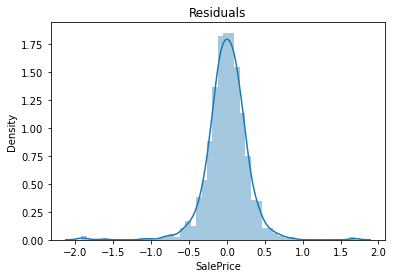

In [11762]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [11763]:
y_test_pred = lasso.predict(X_test) 

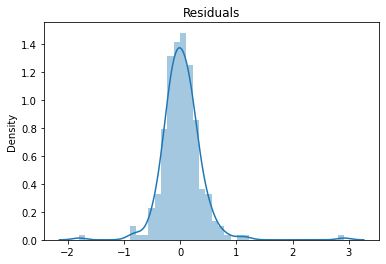

In [11764]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [11765]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

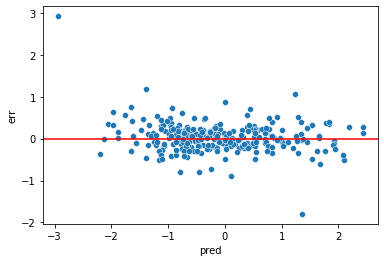

In [11766]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [11767]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)

error_metrics["Lasso"] = np.array([r2_test,r2_train,mse_train,mse_test])
error_metrics

R2 Test:  0.8637632921777119
R2 Train:  0.9263477274381969
MSE Train:  0.07365227256180303
MSE Test:  0.1279916003053603


Ridge     Lasso       RFE
R2 Test    0.798722  0.863763  0.798942
R2 Train   0.809744  0.926348  0.808706
MSE Train  0.190256  0.073652  0.191294
MSE Test   0.189097  0.127992  0.188890

In [11768]:
metrics = pd.DataFrame()
metrics["cols"]=X_train.columns
metrics['coeff_lasso']=lasso.coef_

metrics_gl = metrics[:]

In [11769]:
metrics_gl["coeff_lasso_abs"] = metrics_gl.coeff_lasso.apply(lambda x: abs(x))

In [11770]:
metrics_gl = metrics_gl.sort_values(by=['coeff_lasso_abs'], ascending=False)
metrics_gl.reset_index(inplace=True)
metrics_gl[metrics_gl["coeff_lasso_abs"]>0.000000].head(20)


index                  cols  coeff_lasso  coeff_lasso_abs
0      13             GrLivArea     0.321425         0.321425
1       2           OverallQual     0.193485         0.193485
2      27              PoolArea     0.145535         0.145535
3     225           PoolQC_None     0.124455         0.124455
4       4             YearBuilt     0.121216         0.121216
5     224             PoolQC_Gd    -0.117472         0.117472
6      21            GarageCars     0.113584         0.113584
7       3           OverallCond     0.107498         0.107498
8      85       Condition2_PosN    -0.078523         0.078523
9      65  Neighborhood_NridgHt     0.073579         0.073579
10     55  Neighborhood_Crawfor     0.071475         0.071475
11      0            MSSubClass    -0.068431         0.068431
12    239          SaleType_New     0.063464         0.063464
13     70  Neighborhood_Somerst     0.058196         0.058196
14     33           MSZoning_RL     0.055648         0.055648
15    245  SaleCondition_Normal     0.050403         0.050403
16      1               LotArea     0.049964         0.049964
17     14          BsmtFullBath     0.045099         0.045099
18     75       Condition1_Norm     0.042727         0.042727
19     22            WoodDeckSF     0.041806         0.041806

In [11771]:
error_metrics 

Ridge     Lasso       RFE
R2 Test    0.798722  0.863763  0.798942
R2 Train   0.809744  0.926348  0.808706
MSE Train  0.190256  0.073652  0.191294
MSE Test   0.189097  0.127992  0.188890

## Lambda Optimal
### Ridge: 18.33 ,                 Lasso: 0.0051

## Ridge is the selected model 
### Ridge model is much stable because test and train scores are very close compared to Lasso. 
